# **Thuật toán K-means**

## **1. Lý thuyết**

- **LT:** Thuật toán K-means là một `phương pháp phân cụm (clustering)` được sử dụng rộng rãi trong học máy và khai phá dữ liệu. Mục tiêu của K-means là chia một tập dữ liệu thành K nhóm (cluster) sao cho các điểm dữ liệu trong cùng một nhóm gần nhau hơn về khoảng cách so với các điểm dữ liệu trong các nhóm khác.

- **Các bước chính của thuật toán K-means:**

    - **`B1: Khởi tạo`** -> Chọn K điểm ban đầu làm các trung tâm cụm (centroid). Các điểm này có thể được chọn ngẫu nhiên hoặc theo một số phương pháp khác.
 
    - **`B2: Gán điểm dữ liệu vào các cụm `** -> Mỗi điểm dữ liệu sẽ được gán vào cụm có trung tâm gần nhất (theo khoảng cách Euclidean hoặc các khoảng cách khác).
 
    - **`B3: Cập nhật các trung tâm cụm `** -> Sau khi các điểm dữ liệu đã được gán vào các cụm, tính toán trung bình của các điểm trong mỗi cụm để cập nhật vị trí của trung tâm cụm mới.
 
    - **`B4: Lặp lại `** -> Lặp lại bước 2 và 3 cho đến khi các trung tâm cụm không thay đổi nhiều (hoặc sau một số lần lặp cố định).
 
- **Ưu điểm:**

    - Đơn giản và dễ hiểu.

    - Tính toán nhanh và hiệu quả cho các tập dữ liệu lớn.

- **Nhược điểm:**

    - Cần biết trước số cụm (K) cần phân.

    - Có thể bị ảnh hưởng bởi các điểm khởi tạo ban đầu.

    - Không phù hợp cho các cụm có hình dạng phức tạp hoặc kích thước khác nhau.

## **2. Ứng dụng trong bảo mật**

- **Phát hiện xâm nhập (Intrusion Detection):** K-means có thể được sử dụng để phân tích lưu lượng mạng và phát hiện các hành vi bất thường. Các cụm của dữ liệu bình thường và dữ liệu bất thường có thể được xác định, từ đó giúp phát hiện các cuộc tấn công mạng như DoS, DDoS, và các hành vi xâm nhập khác.

- **Phân loại mã độc (Malware Classification):** K-means có thể được sử dụng để phân cụm các mẫu mã độc dựa trên các đặc trưng của chúng. Điều này giúp các chuyên gia bảo mật phân loại và hiểu rõ hơn về các loại mã độc khác nhau, từ đó xây dựng các biện pháp phòng ngừa hiệu quả.

- **Phân tích nhật ký (Log Analysis):** Phân cụm các bản ghi nhật ký (logs) để phát hiện các hành vi bất thường hoặc các mẫu đáng ngờ. K-means giúp xác định các sự kiện an ninh quan trọng và cải thiện quá trình giám sát an ninh mạng.

- **Phát hiện gian lận (Fraud Detection):** Trong lĩnh vực tài chính và giao dịch trực tuyến, K-means có thể giúp phát hiện các giao dịch gian lận bằng cách xác định các mẫu hành vi bất thường so với các giao dịch hợp lệ.

- **Phân loại người dùng và hành vi (User and Behavior Profiling):** K-means có thể được sử dụng để phân loại người dùng và hành vi của họ trên mạng. Điều này giúp nhận diện các hành vi bất thường hoặc các tài khoản bị xâm nhập, từ đó ngăn chặn các hành vi xấu.

- **Phân tích và bảo vệ dữ liệu (Data Analysis and Protection):** K-means có thể phân cụm các tập dữ liệu nhạy cảm và giúp xác định các vùng dữ liệu có nguy cơ cao. Điều này hỗ trợ trong việc xây dựng các chiến lược bảo vệ dữ liệu và kiểm soát truy cập.

- **Phát hiện thư rác (Spam Detection):** Phân loại email và tin nhắn để xác định thư rác và các tin nhắn lừa đảo. K-means có thể giúp nhận diện các mẫu thư rác và giảm thiểu nguy cơ bị lừa đảo qua email.

## **3. Phương pháp đánh giá mô hình K-means**

- **Silhouette**: Silhouette Score đo lường mức độ gần gũi của mỗi điểm dữ liệu trong cụm của nó so với các cụm khác. Giá trị này nằm trong khoảng từ -1 đến 1, với giá trị cao hơn cho thấy các cụm được phân biệt rõ ràng hơn.


```
    from sklearn.metrics import silhouette_score
    
    # Tính toán Silhouette Score
    sil_score = silhouette_score(X, labels)
    print(f'Silhouette Score: {sil_score}')
```


- **Elbow Method**: Elbow Method là một kỹ thuật phổ biến để xác định số cụm tối ưu. Phương pháp này tính toán tổng bình phương các khoảng cách (inertia) từ các điểm dữ liệu đến tâm cụm của chúng và vẽ biểu đồ với số cụm. Điểm "elbow" là nơi mà tăng thêm số cụm không làm giảm đáng kể tổng khoảng cách.

```
    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans
    
    # Tính toán inertia cho các số cụm khác nhau
    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    
    # Vẽ biểu đồ Elbow
    plt.plot(range(1, 11), inertia, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()
```

- **Calinski-Harabasz Index (Variance Ratio Criterion)**: Chỉ số này đo lường tỷ lệ giữa tổng phương sai giữa các cụm và tổng phương sai trong các cụm. Giá trị cao hơn cho thấy các cụm được phân biệt rõ ràng hơn.

```
    from sklearn.metrics import calinski_harabasz_score

    # Tính toán Calinski-Harabasz Index
    ch_score = calinski_harabasz_score(X, labels)
    print(f'Calinski-Harabasz Score: {ch_score}')
```


- **Davies-Bouldin Index**: Chỉ số này đánh giá sự tương tự giữa các cụm, với giá trị thấp hơn cho thấy các cụm được phân biệt rõ ràng hơn.

```
    from sklearn.metrics import davies_bouldin_score

    # Tính toán Davies-Bouldin Index
    db_score = davies_bouldin_score(X, labels)
    print(f'Davies-Bouldin Score: {db_score}')

```

- **Homogeneity, Completeness và V-Measure** : Ba chỉ số này đánh giá chất lượng của việc phân cụm bằng cách so sánh với các nhãn thực tế (nếu có).
    
    - Homogeneity đo lường mức độ mà các cụm chỉ chứa các điểm dữ liệu của một nhãn duy nhất.

    - Completeness đo lường mức độ mà tất cả các điểm dữ liệu của một nhãn được gán vào cùng một cụm.

    - V-Measure là trung bình điều hòa của Homogeneity và Completeness.

```
    from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

    # Giả sử y_true là các nhãn thực tế
    h_score = homogeneity_score(y_true, labels)
    c_score = completeness_score(y_true, labels)
    v_score = v_measure_score(y_true, labels)

    print(f'Homogeneity Score: {h_score}')
    print(f'Completeness Score: {c_score}')
    print(f'V-Measure Score: {v_score}')

```

- **Đánh giá trực quan**: Việc trực quan hóa kết quả phân cụm cũng rất hữu ích. Bạn có thể sử dụng biểu đồ phân tán để xem cách các cụm được hình thành và các tâm cụm. Điều này đặc biệt hữu ích khi bạn có dữ liệu 2D hoặc có thể giảm chiều dữ liệu xuống 2D bằng cách sử dụng các kỹ thuật như PCA hoặc t-SNE.

```
    import matplotlib.pyplot as plt
    from sklearn.decomposition import PCA

    # Giảm chiều dữ liệu xuống 2D bằng PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Vẽ biểu đồ phân tán của các cụm
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='x')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('K-means Clustering')
    plt.show()

```

## **4. Module sklearn**

**a. Module chính: `sklearn.cluster.KMeans`**

- `__init__(self, n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=1e-4, random_state=None, algorithm='auto')`: Hàm khởi tạo KMeans với các tham số tùy chọn.

    - n_clusters: Số cụm cần phân.
    - init: Phương pháp khởi tạo tâm cụm, mặc định là 'k-means++'.
    - n_init: Số lần khởi tạo khác nhau với các tâm cụm khác nhau.
    - max_iter: Số lần lặp tối đa của thuật toán.
    - tol: Ngưỡng dung sai để xác định hội tụ.
    - random_state: Seed cho ngẫu nhiên.
    - algorithm: Thuật toán sử dụng, có thể là 'auto', 'full', hoặc 'elkan'.

- `fit(self, X, y=None)`: Huấn luyện mô hình K-means trên dữ liệu X.

- `fit_predict(self, X, y=None)`: Huấn luyện mô hình và dự đoán cụm cho các mẫu trong X.

- `fit_transform(self, X, y=None)`: Huấn luyện mô hình và trả về các khoảng cách của các mẫu trong X đến các tâm cụm.

- `predict(self, X)`: Dự đoán cụm của các mẫu trong X.

- `transform(self, X)`: Tính toán và trả về các khoảng cách của các mẫu trong X đến các tâm cụm.

- `cluster_centers_`: Thuộc tính trả về tọa độ các tâm cụm.

- `labels_`: Thuộc tính trả về các nhãn của các mẫu đã được gán cụm.

- `inertia_`: Tổng bình phương các khoảng cách của các mẫu đến tâm cụm gần nhất, đo lường mức độ chặt chẽ của các cụm.



**b. sklearn.metrics**

- `sklearn.metrics.silhouette_score(X, labels, metric='euclidean')`: Tính toán Silhouette Coefficient để đánh giá độ chặt chẽ và sự phân biệt của các cụm.

- `sklearn.metrics.calinski_harabasz_score(X, labels)`: Tính toán Calinski-Harabasz Index, một chỉ số đánh giá dựa trên tỷ lệ của tổng phương sai giữa các cụm và tổng phương sai trong các cụm.

- `sklearn.metrics.davies_bouldin_score(X, labels)`: Tính toán Davies-Bouldin Index, đánh giá độ chính xác của cụm dựa trên sự tương đồng giữa các cụm.


**c. sklearn.cluster**: `sklearn.cluster.MiniBatchKMeans`: Phiên bản K-means tối ưu hóa cho các tập dữ liệu lớn bằng cách sử dụng các batch nhỏ trong quá trình học.


**d. sklearn.preprocessing**: `sklearn.preprocessing.StandardScaler()`: Chuẩn hóa các đặc trưng để có giá trị trung bình bằng 0 và phương sai bằng 1.


**e. sklearn.pipeline**: `sklearn.pipeline.Pipeline`: Tạo pipeline để thực hiện các bước chuẩn bị dữ liệu và huấn luyện mô hình liên tiếp.

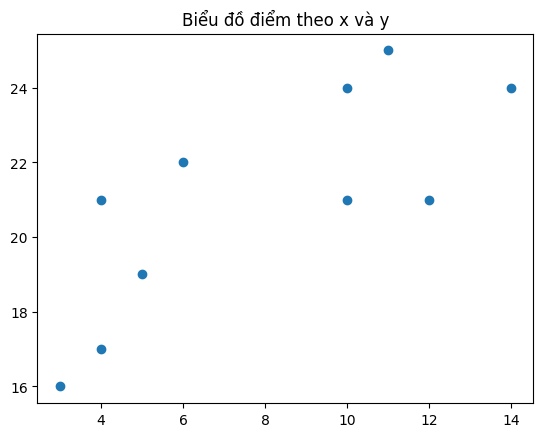

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (6, 22), (10, 21), (12, 21)]
Inertias:  [218.9, 56.4, 34.36666666666667, 20.5, 10.666666666666668, 6.5, 4.0, 2.0, 1.0, 0.0]


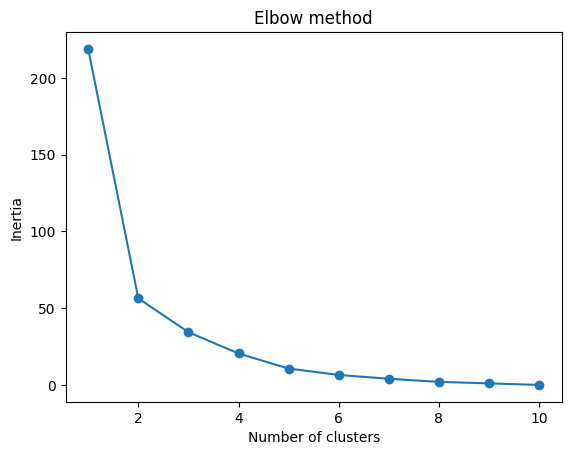

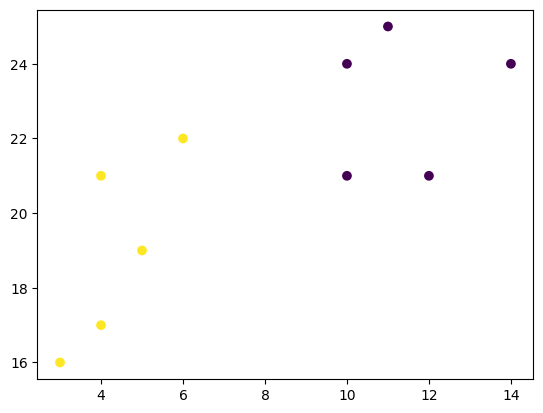

In [8]:
# VD minh họa 2 (W3School)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Dữ liệu
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))
print(data)



# Bảng giá trị inertias
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
print("Inertias: ", inertias)


plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

### Các bước thực hiện trong đoạn mã trên

- Việc chọn 2 cụm trong ví dụ trên dựa vào phương pháp Elbow, được sử dụng để xác định số cụm tối ưu cho thuật toán K-means. Dưới đây là giải thích chi tiết:

- Phương pháp Elbow Phương pháp Elbow được sử dụng để tìm ra số lượng cụm hợp lý bằng cách xem xét đồ thị của Inertia (tổng bình phương khoảng cách từ các điểm dữ liệu đến tâm cụm của chúng) theo số lượng cụm. Ý tưởng là khi số lượng cụm tăng, Inertia sẽ giảm vì các điểm dữ liệu gần hơn với tâm cụm của chúng. Tuy nhiên, sau một điểm nào đó (elbow point), việc tăng số cụm sẽ không làm giảm đáng kể Inertia nữa.

- Giải thích chi tiết:

    - `Tính toán Inertia` cho các số lượng cụm khác nhau:

        - Inertia được tính toán cho số cụm từ 1 đến 10.
        
        - Dữ liệu được phân cụm nhiều lần với số cụm khác nhau, và Inertia cho mỗi trường hợp được lưu trữ.
     
    - `Vẽ đồ thị Elbow`:

        - Đồ thị Inertia theo số cụm được vẽ để tìm điểm elbow.

        - Điểm "elbow" trên đồ thị là nơi mà độ dốc của đường cong bắt đầu phẳng ra. Đây là số cụm tối ưu vì nó đại diện cho một sự cân bằng tốt giữa việc giảm Inertia và tăng số cụm.
     
    - `Chọn số cụm`: Trong ví dụ trên, điểm elbow xuất hiện tại số cụm = 2. Điều này có nghĩa là việc chọn 2 cụm cung cấp sự cân bằng tốt nhất giữa việc giảm Inertia và số lượng cụm hợp lý.

### Ý nghĩa của 2 biểu đồ:

**`1. Biểu đồ 1: Elbow Method`**

- Mô tả: Đây là biểu đồ thể hiện Inertia (tổng bình phương khoảng cách từ các điểm dữ liệu đến tâm cụm của chúng) cho từng số lượng cụm (từ 1 đến 10).

- Ý nghĩa: Biểu đồ này giúp chọn số lượng cụm tối ưu bằng phương pháp Elbow. Nơi mà đường cong bắt đầu phẳng (elbow) thường cho thấy số lượng cụm tối ưu. Trong trường hợp này, elbow point nằm ở K=2, vì Inertia giảm mạnh đến K=2 sau đó không giảm nhiều nữa.



**`2. Biểu đồ 2: Phân cụm sau khi áp dụng K-means`**

- Mô tả: Đây là biểu đồ phân tán của các điểm dữ liệu sau khi đã được phân cụm bằng thuật toán K-means với K=2.

- Ý nghĩa: Mỗi điểm dữ liệu được tô màu theo nhãn của cụm mà nó thuộc về. Đây là cách để trực quan hóa kết quả của thuật toán K-means, giúp hiểu rõ hơn về sự phân tách dữ liệu thành các cụm khác nhau.


**`3. Tóm tắt: `**

- Biểu đồ thứ nhất (Elbow Method) giúp chọn số lượng cụm tối ưu dựa trên sự phân tán của dữ liệu (Inertia).

- Sau khi đã chọn số lượng cụm tối ưu là 2 từ Elbow Method, biểu đồ thứ hai (Phân cụm) được sử dụng để hiển thị kết quả phân cụm thực tế của dữ liệu.

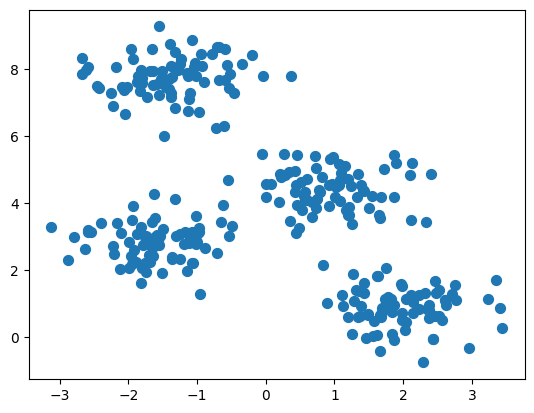

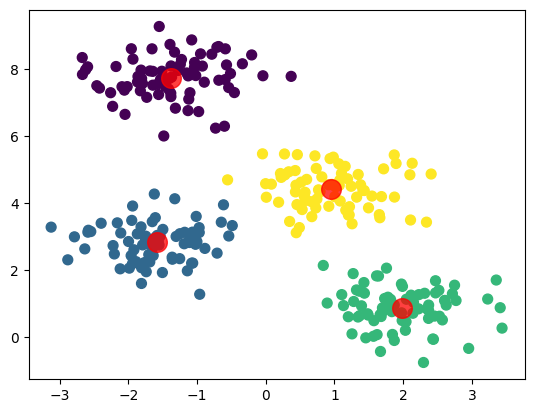

In [1]:
## Ví dụ minh họa:

# Import các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Tạo dữ liệu mẫu
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Hiển thị dữ liệu mẫu
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

# Khởi tạo mô hình KMeans với số cụm K
kmeans = KMeans(n_clusters=4)

# Huấn luyện mô hình trên dữ liệu
kmeans.fit(X)

# Lấy các cụm được dự đoán
y_kmeans = kmeans.predict(X)

# Hiển thị các cụm
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Hiển thị các tâm cụm (centroids)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.show()


### Các bước thực hiện trong đoạn mã trên

1. Import các thư viện cần thiết:
- numpy để xử lý mảng.
- matplotlib.pyplot để vẽ biểu đồ.
- sklearn.cluster.KMeans để thực hiện K-means clustering.
- sklearn.datasets.make_blobs để tạo dữ liệu mẫu.


2. Tạo dữ liệu mẫu: Sử dụng make_blobs để tạo ra một tập dữ liệu giả lập với 300 điểm, 4 cụm, và một độ lệch tiêu chuẩn xác định.


3. Hiển thị dữ liệu mẫu: Vẽ biểu đồ phân tán của các điểm dữ liệu để quan sát dữ liệu.


4. Khởi tạo mô hình KMeans: Khởi tạo đối tượng KMeans với số cụm cần thiết (trong ví dụ này là 4).


5. Huấn luyện mô hình: Sử dụng phương thức fit của KMeans để huấn luyện mô hình trên dữ liệu.


6. Dự đoán các cụm: Sử dụng phương thức predict để dự đoán các cụm của dữ liệu.


7. Hiển thị các cụm và tâm cụm:
- Vẽ biểu đồ phân tán của các điểm dữ liệu, tô màu theo cụm mà chúng thuộc về.
- Vẽ các tâm cụm trên biểu đồ với màu đỏ.


8. Tùy chỉnh và cải tiến:
- Số cụm (K): Bạn có thể thay đổi số cụm bằng cách thay đổi giá trị của n_clusters.
- Khởi tạo tâm cụm: Bạn có thể thử các phương pháp khởi tạo khác nhau như 'k-means++' để cải thiện hiệu suất.
- Đánh giá kết quả: Sử dụng các số liệu như Elbow Method hoặc Silhouette Score để đánh giá số cụm tối ưu.

# **Bài thực tế: Phân cụm dữ liệu điểm thi cuối kỳ và giữa kỳ môn BĐKH và TTX**

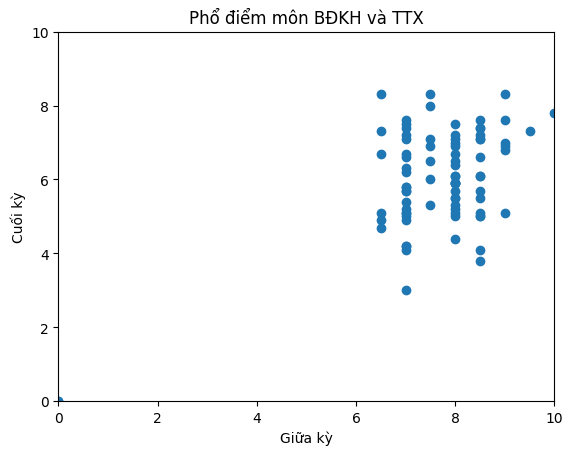

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Công đoạn 1: Chuẩn bị dữ liệu
df = pd.read_excel(r"D:\Root\DataScience\TH\CoBan\BDKH_TTX\DanhSachSinhVien.xlsx")
df = df.fillna(0)

gk = df['BC giữa kì (30%)']
ck = df['BC cuối kì (50%)']
plt.scatter(gk, ck)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.title("Phổ điểm môn BĐKH và TTX")
plt.xlabel("Giữa kỳ")
plt.ylabel("Cuối kỳ")
plt.show()



Inertias:  [350.66226190476186, 230.64674275680423, 80.1754761904762, 58.51109277857485, 40.98033273915628, 33.10897817460318, 29.30511904761905, 23.910172134238316, 20.416676476301475, 19.038650793650795]


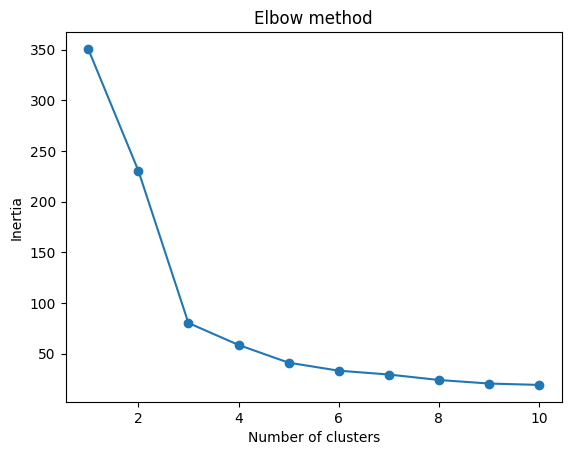

In [34]:
# Công đoạn 2: Thuật toán K-means - Chọn số lượng cụm
data = df[['BC giữa kì (30%)', 'BC cuối kì (50%)']]

inertias = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
print("Inertias: ", inertias)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Như vậy, có thể kết luận là chọn 3 cụm là hợp lý

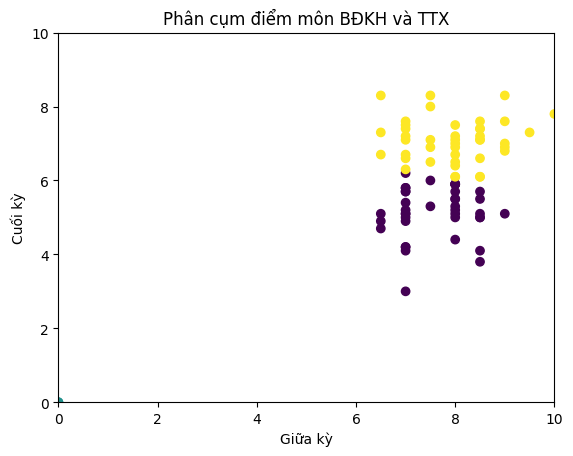

In [39]:
# Công đoạn 3: Áp dụng thuật toán K-means
kmeans = KMeans(n_clusters = 3)  # Số cụm có thể thay đổi tùy ý
kmeans.fit(data)
labels = kmeans.labels_

# Vẽ biểu đồ phân cụm
plt.scatter(gk, ck, c=labels)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.title("Phân cụm điểm môn BĐKH và TTX")
plt.xlabel("Giữa kỳ")
plt.ylabel("Cuối kỳ")
plt.show()

[0 0 0 0 2 2 2 0 2 0 2 0 2 2 2 0 2 0 2 2 1 0 0 0 2 0 2 0 2 0 0 0 2 2 2 0 2
 2 0 0 2 2 2 2 0 0 2 2 2 2 0 2 0 2 0 0 0 2 0 2 2 0 0 2 1 0 2 0 0 0 0 0 0 0
 0 0 2 2 0 0 0 0 2 0]


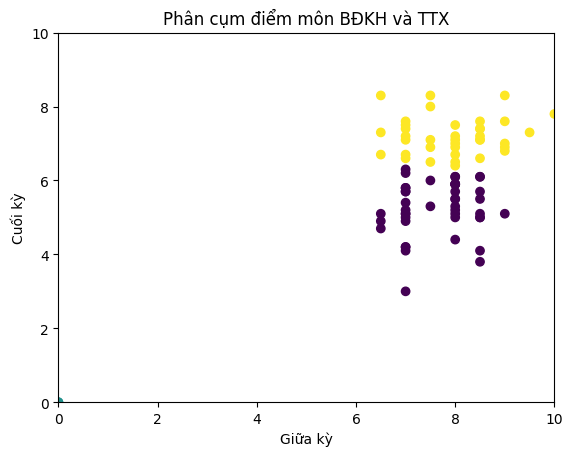

In [54]:
# Hoặc sử dụng fit_predict để huấn luyện và lấy nhãn cụm cùng lúc
labels = kmeans.fit_predict(data)  # Huấn luyện mô hình và trả về nhãn cụm
print(labels)


# Vẽ biểu đồ phân cụm
plt.scatter(gk, ck, c=labels, cmap='viridis')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.title("Phân cụm điểm môn BĐKH và TTX")
plt.xlabel("Giữa kỳ")
plt.ylabel("Cuối kỳ")
plt.show()


In [49]:
# Sử dụng predict để dự đoán cụm cho dữ liệu mới

new_data = pd.DataFrame(
    [[5, 7], [3, 4], [8, 1]], 
    columns=['BC giữa kì (30%)', 'BC cuối kì (50%)']
)
predicted_labels = kmeans.predict(new_data)
print("Predicted labels for new data: ", predicted_labels)


Predicted labels for new data:  [2 0 0]


In [53]:
# Sử dụng transform để lấy khoảng cách đến các tâm cụm

distances = kmeans.transform(data)  # Khoảng cách từ mỗi điểm đến các tâm cụm
print("Distances to cluster centers: \n")
for distance in distances:
    print(distance)


Distances to cluster centers: 

[1.24052757 8.16333265 3.15075791]
[0.89418975 9.86154146 2.27393687]
[1.69221018 9.31074648 3.45018287]
[1.13969673 9.35093578 1.38045419]
[ 1.84566091 10.32763284  0.45823366]
[ 2.23492923 10.18626526  0.965754  ]
[ 2.02918095 11.07519752  0.56399131]
[0.35779848 9.59635347 1.90617198]
[ 2.33086006 10.25914226  0.99075714]
[0.89418975 9.86154146 2.27393687]
[ 1.9723133  10.76289924  0.05432365]
[0.7321337  9.94032193 1.30652406]
[ 2.75765959 11.980818    1.55693036]
[ 3.32853284 12.24295716  1.51959444]
[1.57762754 9.68968524 1.07249632]
[0.56570288 9.82293235 1.50637554]
[ 2.30468551 11.26987134  0.5872333 ]
[0.78032598 9.02718118 1.77793677]
[1.48691245 9.62081078 1.12308924]
[ 1.48324636 10.43503713  0.50828778]
[ 9.27928504  0.         10.72641245]
[0.7321337  9.94032193 1.30652406]
[0.75396565 9.60468636 1.28525094]
[1.22348218 9.41753683 1.30941692]
[ 2.04423791 10.04191217  0.94596139]
[2.35008694 7.61577311 4.31048122]
[ 1.77595601 10.63014581 